In [13]:
import json
import os

import pandas as  pd
import spacy

import seaborn as sns
import string

from tqdm import tqdm
from textblob import TextBlob

from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import re


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline


from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction import DictVectorizer

import swifter

c:\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [14]:
df = pd.read_csv('chatbot_dataset.csv', encoding='latin-1')

<Axes: >

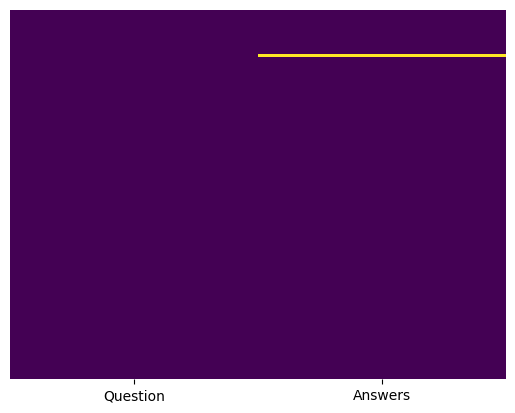

In [15]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [16]:
df=df.fillna("null_value")

In [17]:
df.head()

,Question,Answers
0,Hi,"Hi, How can I help you?"
1,Hello,"Hi Buddy, How can I help you?"
2,I'm in colombo now,"Nice, There are many amazing places you can vi..."
3,What are the best places I can visit in colombo?,"Gangaramaya Temple, Galle Face Green, Mount La..."
4,What are the places I can visit in galle?,"Galle Fort, Sea Turtle Farm Galle Mahamodara, ..."


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  116 non-null    object
 1   Answers   116 non-null    object
dtypes: object(2)
memory usage: 1.9+ KB


In [19]:
df.columns

Index(['Question', 'Answers'], dtype='object')

<Axes: >

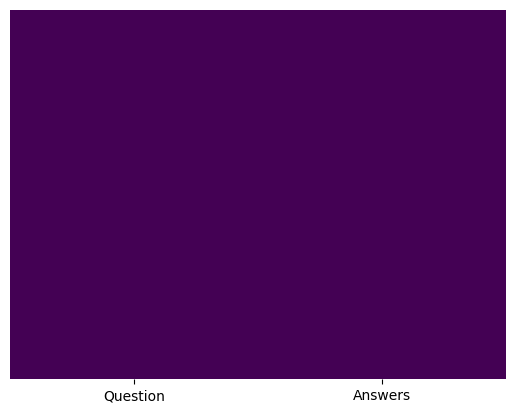

In [20]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [21]:
df.isna().sum()

Question    0
Answers     0
dtype: int64

In [22]:
X = df.drop('Answers', axis=1)
y = df['Answers']

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

In [25]:
text_clf = Pipeline([
...     ('vect', CountVectorizer(analyzer="word", stop_words="english")),
...     ('tfidf', TfidfTransformer(use_idf=True)),
...     ('clf', MultinomialNB(alpha=.01)),
... ])

In [26]:
text_clf.fit(X_train['Question'].to_list(), list(y_train))

Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(alpha=0.01))])

In [27]:
import numpy as np
X_TEST = X_test['Question'].to_list()
Y_TEST = list(y_test)

In [28]:
predicted = text_clf.predict(X_TEST)

In [30]:
text_data = ['What is canine cyclic ?']
predicted = text_clf.predict(text_data)
print(predicted[0])


Dunhinda Falls , Dhowa Rock Temple , Bogoda Wooden Bridge , . Narangala ,ÿ Muthiyangana Raja Maha Viharaya , Fox Hill , St Mark?s Church , Wewessa Ella Waterfall , . Serendib Toursÿ


In [31]:
import pickle
pickle.dump(text_clf, open("chatbot.dat", "wb"))

In [32]:
with open('chatbot.dat' , 'rb') as f:
    model = pickle.load(f)

In [33]:
text_data = ['Hi?']
model.predict(text_data)

array(['Hi, How can I help you?'], dtype='<U1186')